In [126]:
import pandas as pd

IMDB (https://datasets.imdbws.com/) has data available for use, but it requires some preprocessing. For starters, the name of the movie and the rating aren't in the same dataset. So we will combine those to one pandas dataframe. We can also combine any of the IMDB datasets for further data mining, as they have a shared constant for every row (tconst)


In [127]:
imdb_basics = pd.read_csv('data_imdb_basics.tsv', sep='\t')
imdb_basics.shape

<ipython-input-127-66eece6d45dd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_basics = pd.read_csv('data_imdb_basics.tsv', sep='\t')


(9621894, 9)

In [128]:
imdb_ratings = pd.read_csv('data_imdb_ratings.tsv', sep='\t')
imdb_ratings.shape

(1280237, 3)

In [129]:
# DEPRECATED DATASET WE ORIGINALLY WANTED TO USE
#netflix = pd.read_csv('netflix_titles.csv')
#netflix.shape

In [130]:
# DEPRECATED DATASET
# NETFLIX:\n{netflix.iloc[:1]}\n\n\n
print(f"IMDB BASICS:\n{imdb_basics.iloc[:5]}\n\n\nIMDB RATINGS:\n{imdb_ratings.iloc[:5]}")

IMDB BASICS:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  


IMDB RATINGS:
      tconst  averageRating  numVotes
0  tt0000001            5.7      1952
1  tt0000002            

In [131]:
imdb_combined = imdb_basics.merge(imdb_ratings, left_on='tconst', right_on='tconst')
print(f"{imdb_combined.shape}")

print(f"\nIMDB COMBINED:\n{imdb_combined.iloc[:5]}")

(1280236, 11)

IMDB COMBINED:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  \
0       0      1894      \N              1         Documentary,Short   
1       0      1892      \N              5           Animation,Short   
2       0      1892      \N              4  Animation,Comedy,Romance   
3       0      1892      \N             12           Animation,Short   
4       0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.7      1952  
1            5.8       264  
2    

Data is now in two sets, Netflix information, and IMDB information. Lets create one data set that contains Netflix, and IMDB movies together.

In [132]:
# DEPRECATED DATASET
#netflix_imdb_combined = pd.merge(netflix,imdb_combined, suffixes=['_netflix','_imdb'], left_on='title', right_on='originalTitle')
#print(f"{netflix_imdb_combined.shape}\n\nNETFLIX IMDB COMBINED:\n{netflix_imdb_combined.iloc[:1]}")

Now we have a combined dataframe of the shows available on netflix, and their imdb information. Lets filter out the TV shows

In [133]:
# DEPRECATED DATASET
#netflix_imdb_combined_no_tv = netflix_imdb_combined[(netflix_imdb_combined['type'] == 'Movie')]
#print(f"{netflix_imdb_combined_no_tv.shape}\n\nCOMBINED NO TV:\n{netflix_imdb_combined_no_tv.iloc[:1]}")

Lets also filter out an NaN rows

In [134]:

imdb_combined = imdb_combined.dropna()

 Lets start by creating our test/training data split (85/15)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train, test = train_test_split(imdb_combined, test_size=0.15)

print(f"TRAINING:\t{train.shape}\n{train.iloc[:1]}\n\n\nTESTING:\t{test.shape}\n{test.iloc[:1]}")

TRAINING:	(1088198, 11)
            tconst  titleType                     primaryTitle  \
648593  tt14139080  tvEpisode  Everybody Loves the Carringtons   

                          originalTitle isAdult startYear endYear  \
648593  Everybody Loves the Carringtons       0      2021      \N   

       runtimeMinutes genres  averageRating  numVotes  
648593             42  Drama            7.0       367  


TESTING:	(192036, 11)
           tconst titleType         primaryTitle        originalTitle isAdult  \
121124  tt0181523     movie  Ena Koritsi Gia Dyo  Ena koritsi gia dyo       0   

       startYear endYear runtimeMinutes          genres  averageRating  \
121124      1963      \N             90  Comedy,Romance            6.3   

        numVotes  
121124       368  


In [137]:
# Generate list of all genres
genre_list = []

genres = train['genres'].unique()
for genresgroup in genres:
  if genresgroup != genresgroup:
    print(genresgroup)
  genre_sep = genresgroup.split(',')
  genre_list = genre_list + genre_sep

# Find unique genres from our data.
list_set = set(genre_list)
unique_list_genre = (list(list_set))
unique_list_genre.remove("\\N")
for genre in unique_list_genre:
  print(genre)

Crime
Comedy
History
Mystery
Talk-Show
Music
Fantasy
Sport
Biography
Musical
News
Sci-Fi
Action
Thriller
Reality-TV
Family
Animation
Drama
Romance
Western
Short
Film-Noir
War
Adult
Documentary
Horror
Game-Show
Adventure


In [138]:
# Create dictionary for all genres
genre_split = {}
# Add each genre as a key, and its dictionary as the value
for genre in unique_list_genre:
  genre_split[genre] = train.loc[(train['genres'].str.contains(genre))]

print(genre_split['Horror'].iloc[:1])

           tconst titleType primaryTitle originalTitle isAdult startYear  \
959068  tt3443808     video     Chubbies      Chubbies       0      2014   

       endYear runtimeMinutes                genres  averageRating  numVotes  
959068      \N             89  Comedy,Horror,Sci-Fi            4.7        91  


Now all of our data is split by genre as well.

In [139]:
genre_split_avg = {}
# for each genre
for genre in unique_list_genre:
  #initalize values
  avg = 0
  count = 0
  #declare working genre
  print(f"GENRE: {genre}:")
  #iterate over dataframe to find the average rating, and number of movies
  for index, row in genre_split[genre].iterrows():
    #print(row['primaryTitle'], row['averageRating'])
    avg = avg + row['averageRating']
    count = count + 1
  avg = avg/count
  print(f"\nAverage: {avg}, Number: {count}\n\n")
  #split dataframe above and below average
  genre_split_avg['B'+genre] = genre_split[genre][genre_split[genre]['averageRating'] <= avg]
  genre_split_avg['A'+genre] = genre_split[genre][genre_split[genre]['averageRating'] > avg]

GENRE: Crime:

Average: 7.141819996043043, Number: 116253


GENRE: Comedy:

Average: 6.988683059152979, Number: 342840


GENRE: History:

Average: 7.346030372933504, Number: 31212


GENRE: Mystery:

Average: 7.132382305579212, Number: 52785


GENRE: Talk-Show:

Average: 6.873209364104323, Number: 30115


GENRE: Music:

Average: 6.96755002939705, Number: 45923


GENRE: Fantasy:

Average: 7.065640483583272, Number: 45411


GENRE: Sport:

Average: 7.118973884908732, Number: 21635


GENRE: Biography:

Average: 7.2209120550270836, Number: 22389


GENRE: Musical:

Average: 6.627235810746995, Number: 10589


GENRE: News:

Average: 6.693392980041285, Number: 14530


GENRE: Sci-Fi:

Average: 6.725301953205907, Number: 28978


GENRE: Action:

Average: 7.018534937412822, Number: 135571


GENRE: Thriller:

Average: 6.406603268148968, Number: 44796


GENRE: Reality-TV:

Average: 6.961207515452866, Number: 57109


GENRE: Family:

Average: 7.072674595913373, Number: 78696


GENRE: Animation:

Average

In [140]:
print(f"{genre_split_avg['AAction'].iloc[:1]}\n\n\n{genre_split_avg['BAction'].iloc[:1]}")

           tconst  titleType                       primaryTitle  \
635056  tt1383574  tvEpisode  Haruka vs Shu! The Final Battle!!   

                            originalTitle isAdult startYear endYear  \
635056  Haruka vs Shu! The Final Battle!!       0      2006      \N   

       runtimeMinutes                      genres  averageRating  numVotes  
635056             22  Action,Adventure,Animation            7.5       100  


           tconst  titleType            primaryTitle           originalTitle  \
586424  tt1281261  tvEpisode  Flash Back/The Warrior  Flash Back/The Warrior   

       isAdult startYear endYear runtimeMinutes                      genres  \
586424       0      1982      \N             24  Action,Adventure,Animation   

        averageRating  numVotes  
586424            5.8        18  


lets plot rating against time. where the x axis is time (year) and y axis is rating

In [141]:
# rating_data = { 'genre': [title,year,rating],[title,year,rating], 'genre': [title,year,rating] }
rating_data = {}

for genre in genre_split:
  title_year_rating = []
  #print(genre, '->', genre_split[genre].iloc[:1])
  for index, row in genre_split[genre].iterrows():

    title = row['primaryTitle']
    year = row['startYear']
    rating = row['averageRating']
    tyr = [title,year,rating]
    title_year_rating.append(tyr)

  rating_data[genre] = title_year_rating
  

In [142]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

[1995] [5.4]
[1995, 2003] [5.4, 8.0]
[1995, 2003, 2018] [5.4, 8.0, 7.3]
[1995, 2003, 2018, 2014] [5.4, 8.0, 7.3, 8.1]
[1995, 2003, 2018, 2014, 2014] [5.4, 8.0, 7.3, 8.1, 9.0]
[1995, 2003, 2018, 2014, 2014, 1959] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4]
[1995, 2003, 2018, 2014, 2014, 1959, 1996] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7]
[1995, 2003, 2018, 2014, 2014, 1959, 1996, 2020] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7, 6.3]
[1995, 2003, 2018, 2014, 2014, 1959, 1996, 2020, 1960] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7, 6.3, 8.4]
[1995, 2003, 2018, 2014, 2014, 1959, 1996, 2020, 1960, 2010] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7, 6.3, 8.4, 7.6]
best fit line:
y = -13.67 + 0.01x
[1998] [4.2]
[1998, 2014] [4.2, 7.2]
[1998, 2014, 2007] [4.2, 7.2, 6.6]
[1998, 2014, 2007, 1995] [4.2, 7.2, 6.6, 6.0]
[1998, 2014, 2007, 1995, 2014] [4.2, 7.2, 6.6, 6.0, 4.7]
[1998, 2014, 2007, 1995, 2014, 2008] [4.2, 7.2, 6.6, 6.0, 4.7, 6.5]
[1998, 2014, 2007, 1995, 2014, 2008, 1994] [4.2, 7.2, 6.6, 6.0, 4.7, 6.5, 8.7]
[1998, 2014, 2007, 

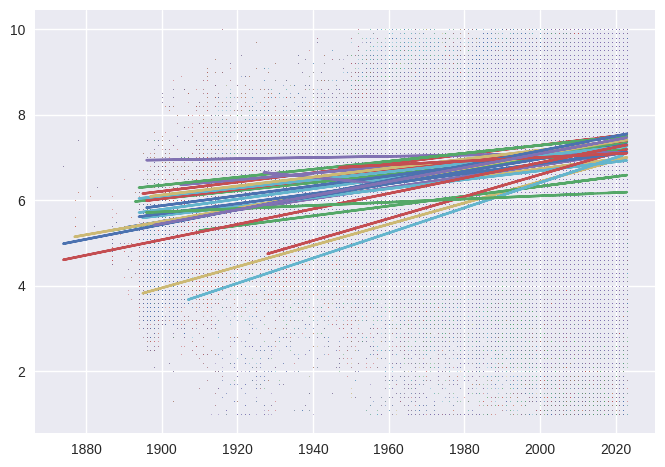

In [143]:
import matplotlib.pyplot as plt

for genre in genre_split:
  year = []
  rating = []
  
  for index, row in genre_split[genre].iterrows():
    if row['startYear'] != '\\N':
      
      year.append(int(row['startYear']))
      rating.append(float(row['averageRating']))
      if len(year) <= 10: 
        print(year, rating)
  
  plt.scatter(year, rating, s=.1, alpha=.75)

  a, b = best_fit(year, rating)

  yfit = [a + b * yeari for yeari in year]
  plt.plot(year, yfit)

Putting all this info onto one graph is extremely messy. Lets clean it up a bit

best fit line:
y = -13.67 + 0.01x


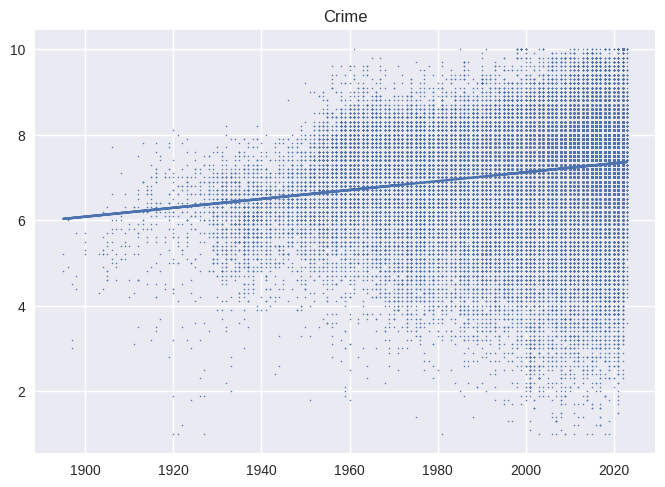

best fit line:
y = -11.80 + 0.01x


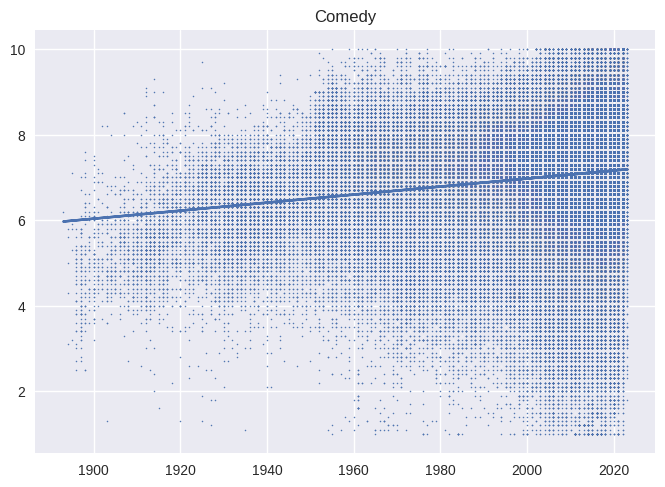

best fit line:
y = -14.26 + 0.01x


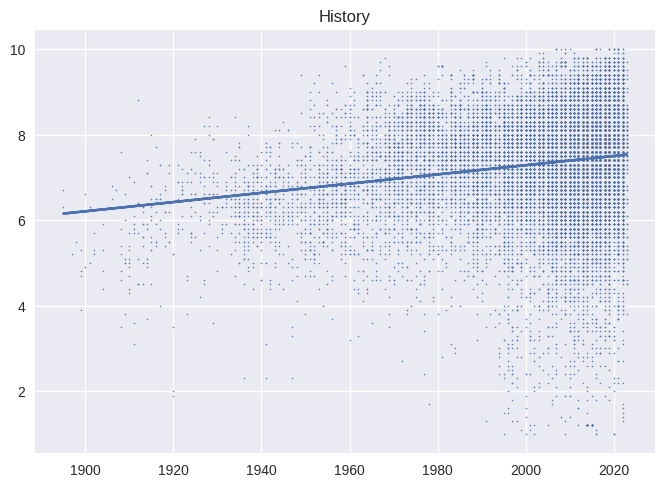

best fit line:
y = -8.47 + 0.01x


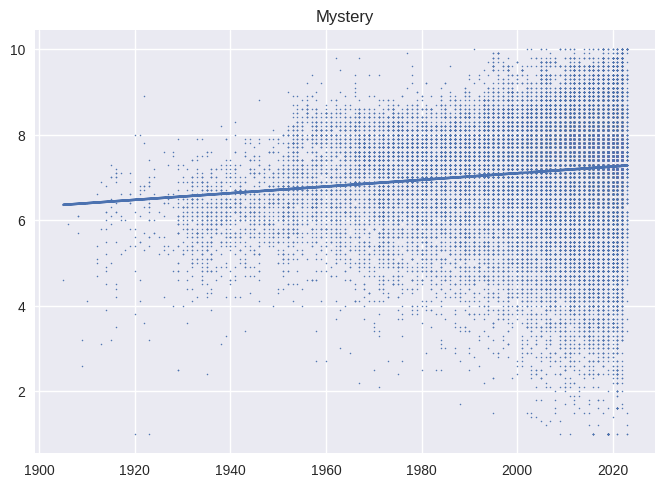

best fit line:
y = -15.88 + 0.01x


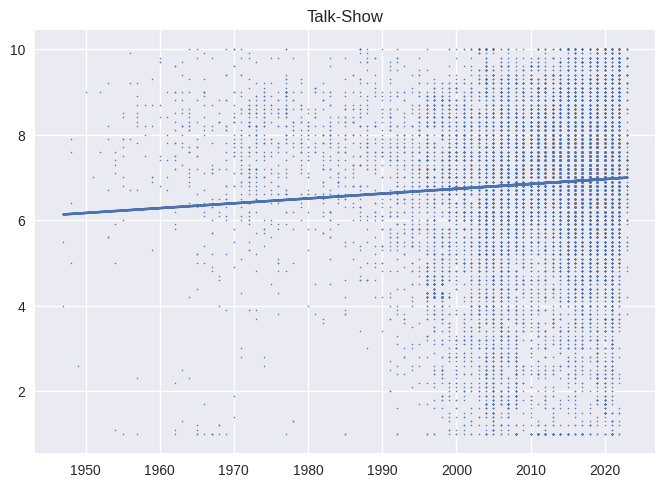

best fit line:
y = -17.17 + 0.01x


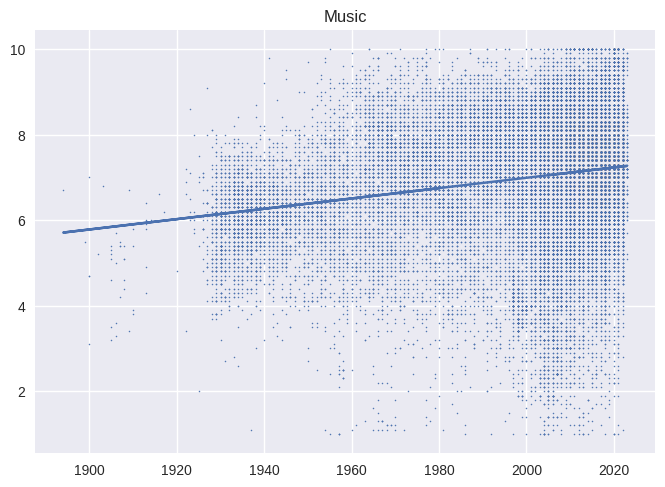

best fit line:
y = -16.04 + 0.01x


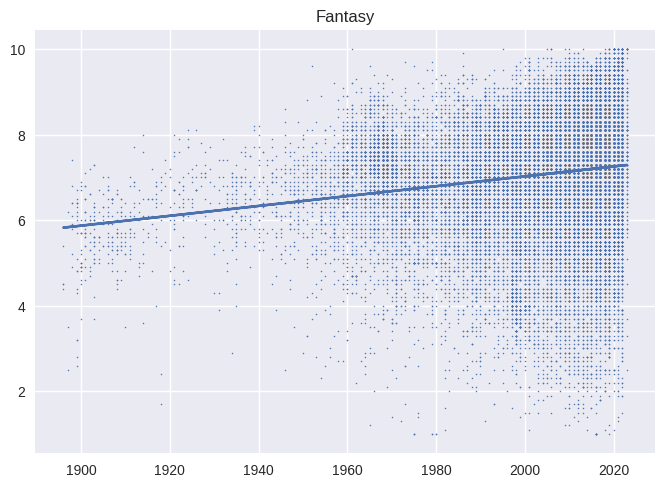

best fit line:
y = -23.33 + 0.02x


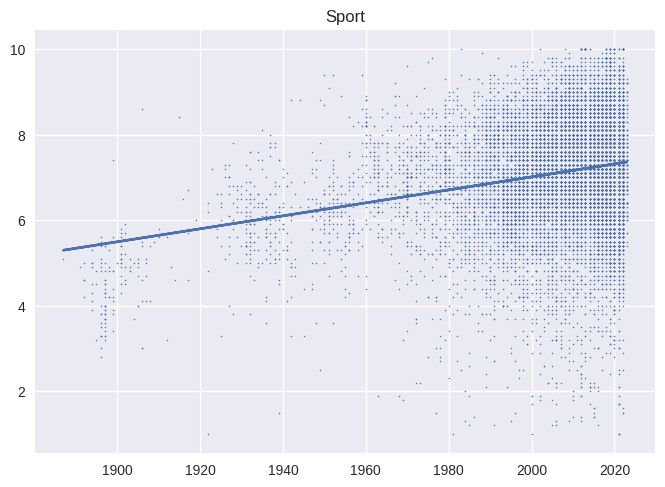

best fit line:
y = -15.07 + 0.01x


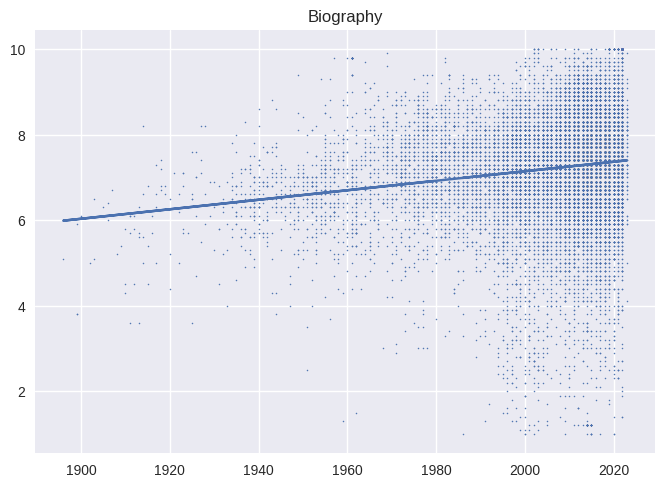

best fit line:
y = -19.32 + 0.01x


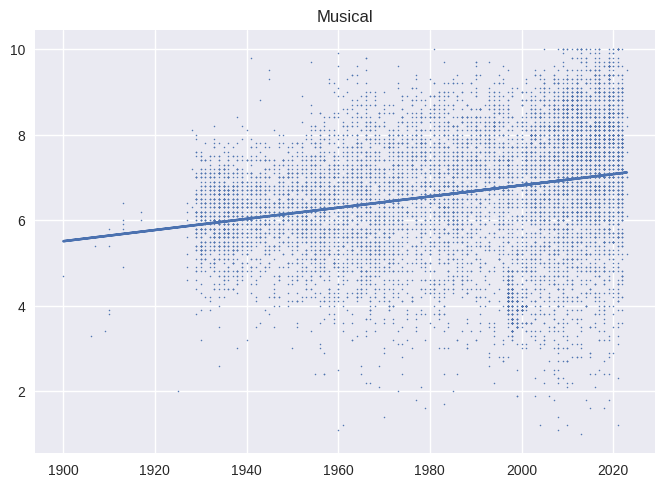

best fit line:
y = -43.24 + 0.02x


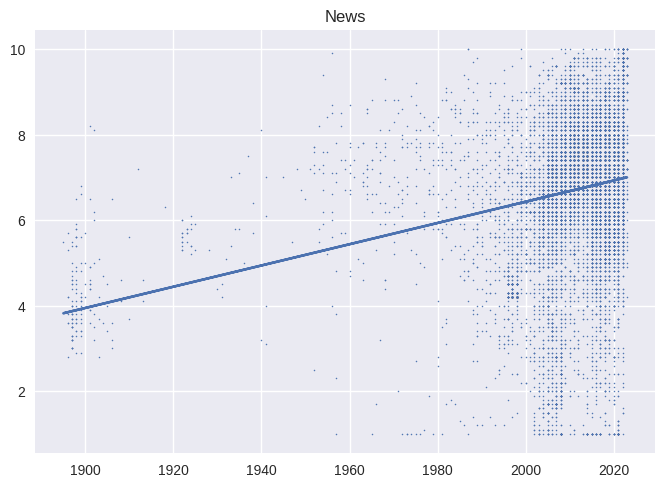

best fit line:
y = -14.25 + 0.01x


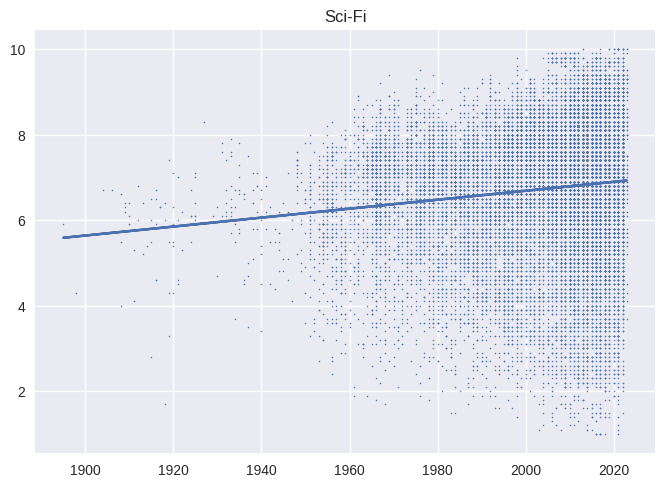

best fit line:
y = -22.31 + 0.01x


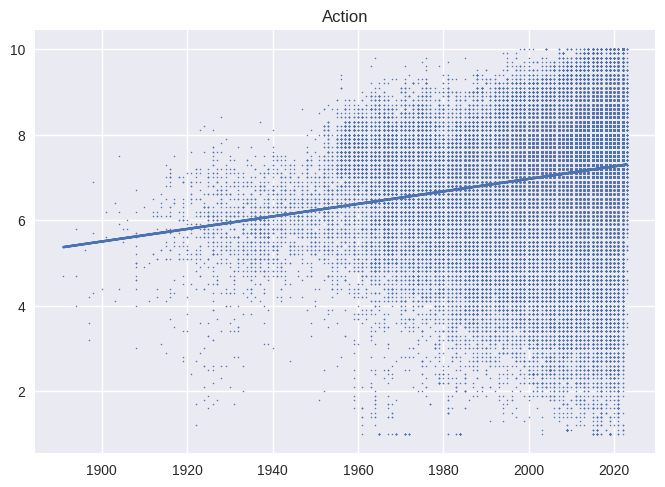

best fit line:
y = -16.63 + 0.01x


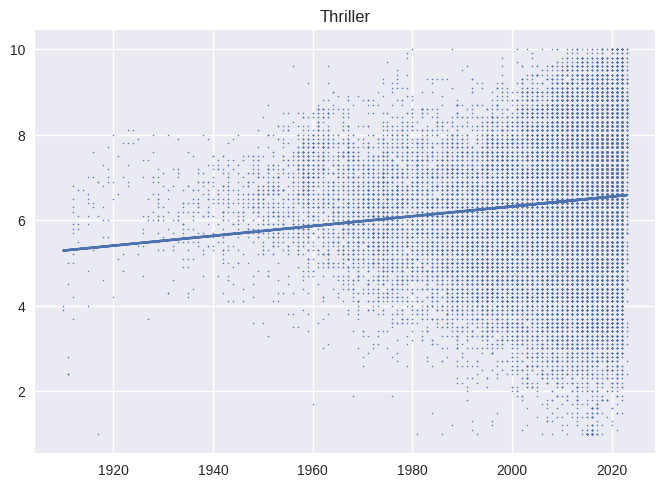

best fit line:
y = -44.80 + 0.03x


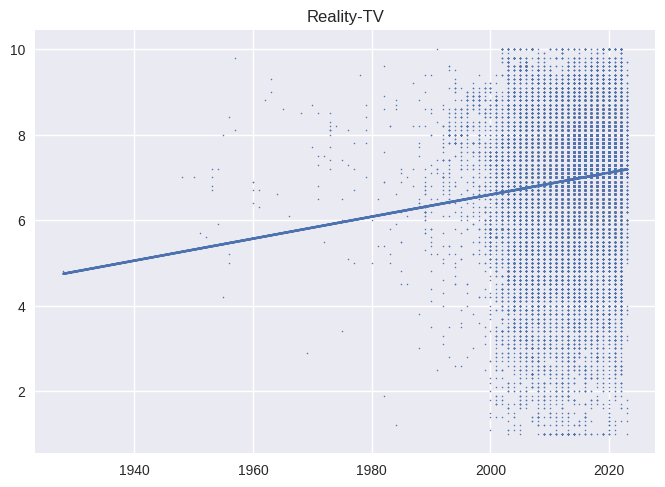

best fit line:
y = 4.28 + 0.00x


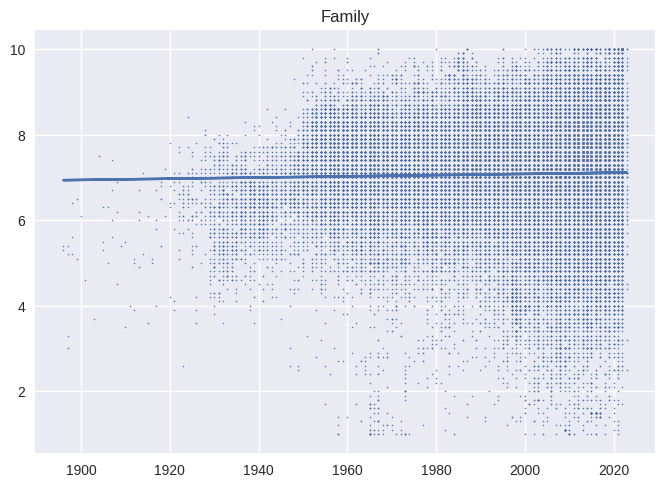

best fit line:
y = -24.08 + 0.02x


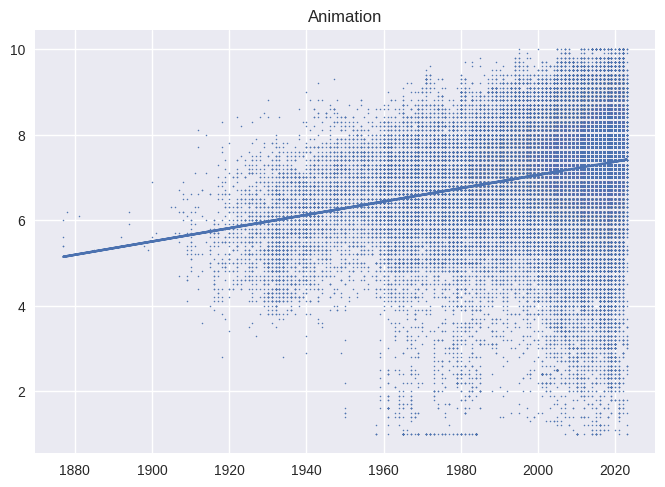

best fit line:
y = -11.87 + 0.01x


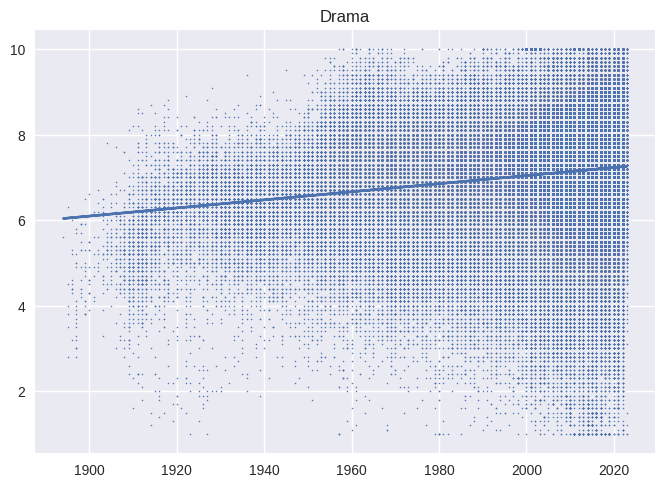

best fit line:
y = -16.56 + 0.01x


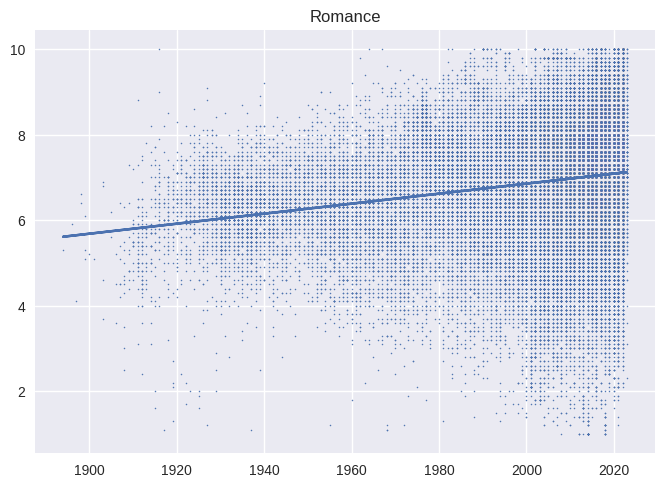

best fit line:
y = -11.40 + 0.01x


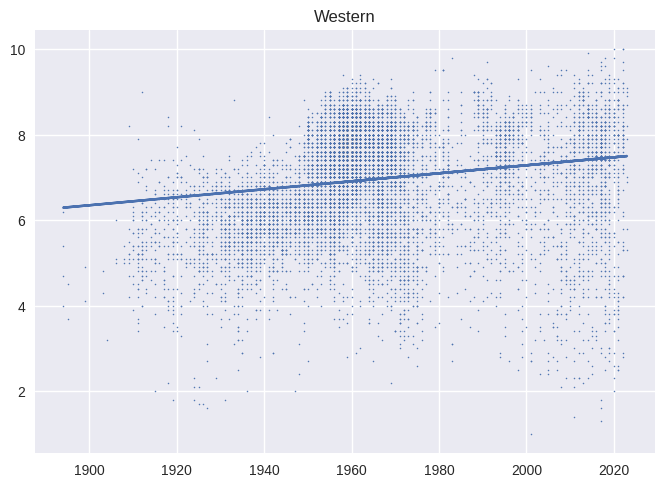

best fit line:
y = -29.18 + 0.02x


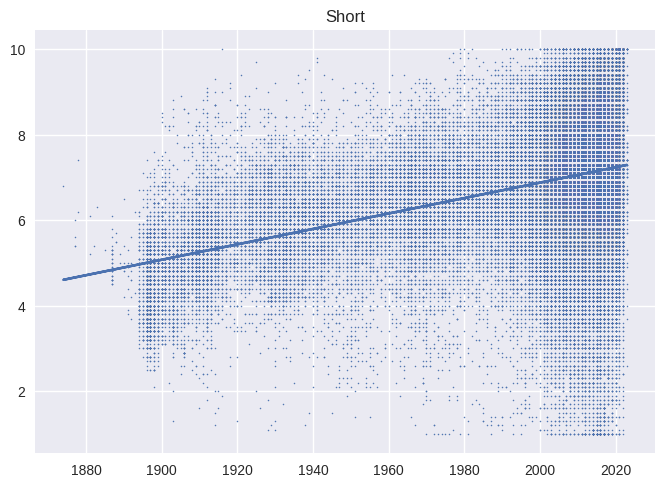

best fit line:
y = 23.14 + -0.01x


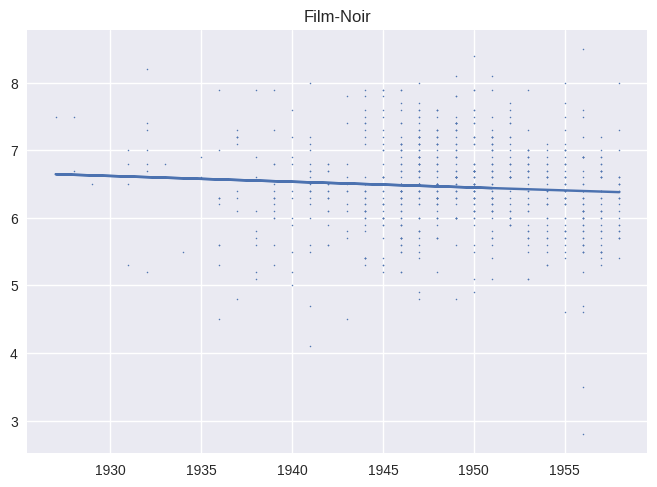

best fit line:
y = -13.80 + 0.01x


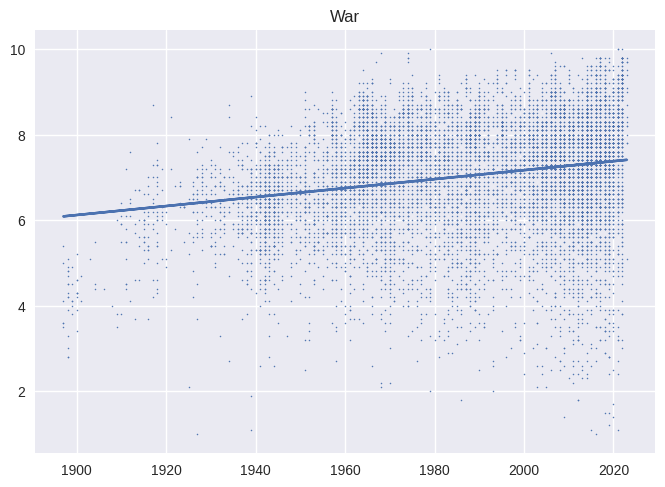

best fit line:
y = -52.38 + 0.03x


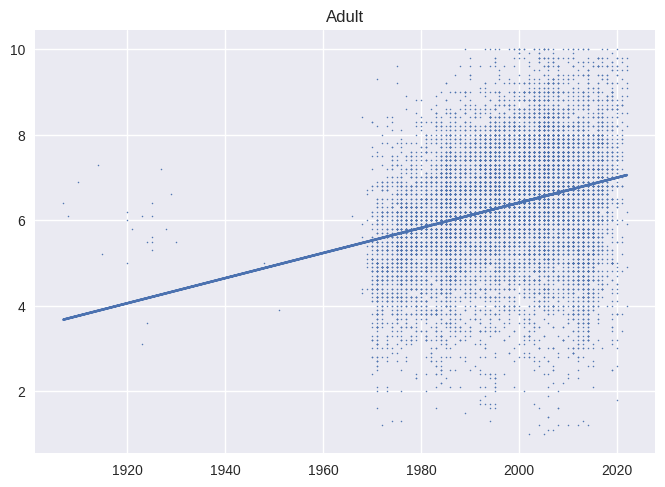

best fit line:
y = -27.32 + 0.02x


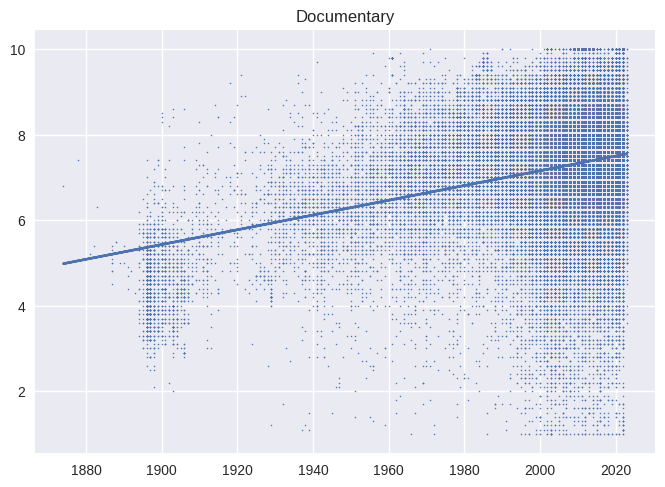

best fit line:
y = -1.38 + 0.00x


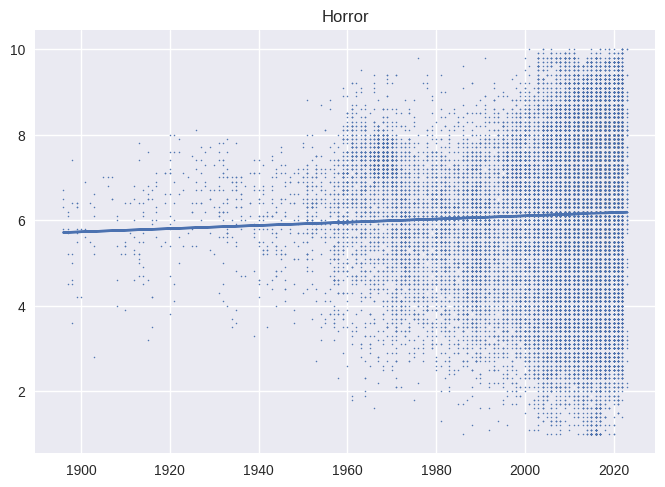

best fit line:
y = -1.64 + 0.00x


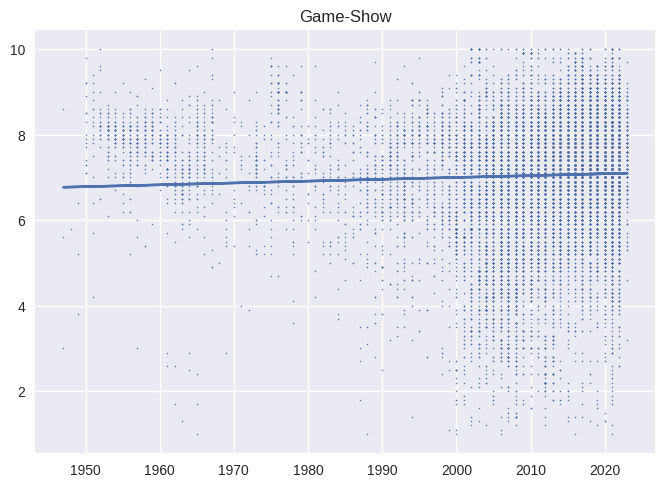

best fit line:
y = -25.62 + 0.02x


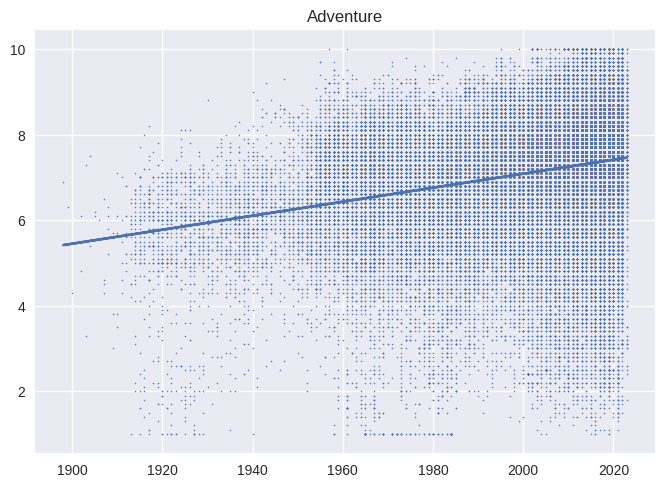

<Figure size 800x550 with 0 Axes>

In [144]:
import matplotlib.pyplot as plt
bestfits = {}
for genre in genre_split:
  year = []
  rating = []
  
  for index, row in genre_split[genre].iterrows():
    if row['startYear'] != '\\N':
      year.append(int(row['startYear']))
      rating.append(float(row['averageRating']))
  
  plt.title(genre)
  plt.scatter(year, rating, s=.6)

  a, b = best_fit(year, rating)
  bestfits[genre] = [a,b]
  yfit = [a + b * yeari for yeari in year]
  plt.plot(year, yfit)
  plt.show()
  plt.clf()

In [145]:
print(bestfits)
highestb = 0
highestbg = ""
highesta = 0
highestag = ""

lowestb = 0
lowestbg = ""
lowesta = 0
lowestag = ""

for genre in bestfits:
  if bestfits[genre][0] > highestb:
    highestb = bestfits[genre][0]
    highestbg = genre
  if bestfits[genre][1] > highesta:
    highesta = bestfits[genre][1]
    highestag = genre
  if bestfits[genre][0] < lowestb:
    lowestb = bestfits[genre][0]
    lowestbg = genre
  if bestfits[genre][1] < lowesta:
    lowesta = bestfits[genre][1]
    lowestag = genre

print(f"Highest starting value: {highestbg} with {highestb}\nMost improvement over the years: {highestag} with {highesta}")
print(f"Lowest starting value: {lowestbg} with {lowestb}\nMost degraded over the years: {lowestag} with {lowesta}")

{'Crime': [-13.671131278847193, 0.010395788689438055], 'Comedy': [-11.795263229268372, 0.009383896367721497], 'History': [-14.26194920677155, 0.010773194898180736], 'Mystery': [-8.466216847828097, 0.007781740083392541], 'Talk-Show': [-15.88283760667808, 0.011307874820479095], 'Music': [-17.1673809843522, 0.01207869555941277], 'Fantasy': [-16.04128647052476, 0.011532544104470056], 'Sport': [-23.33018962057568, 0.015170432738985837], 'Biography': [-15.070878855792985, 0.011106796646604895], 'Musical': [-19.32058360953547, 0.013067473863163316], 'News': [-43.23757993147416, 0.024833859310266243], 'Sci-Fi': [-14.246102994280857, 0.010466334309625723], 'Action': [-22.312620581447334, 0.014638582852197775], 'Thriller': [-16.62725084935351, 0.01147437696561087], 'Reality-TV': [-44.803702557104444, 0.025699811711743206], 'Family': [4.282853321573924, 0.0013987242237185034], 'Animation': [-24.080781062233218, 0.015569486341862723], 'Drama': [-11.871671560238065, 0.009456469018614395], 'Romance'

This is interesting information since the it implies the starting values are determining future popularity, what was once the most popular, is now least, and what was unpopular, is now popular

Lets verify by applying this to our test set. we've previously been using our training data. Lets see if we get similar results.

Lets save the data from our bestfit lines for comparisson later.

In [146]:
testbestfits = bestfits

In [147]:
# Generate list of all genres
genre_list = []

genres = test['genres'].unique()
for genresgroup in genres:
  if genresgroup != genresgroup:
    print(genresgroup)
  genre_sep = genresgroup.split(',')
  genre_list = genre_list + genre_sep

# Find unique genres from our data.
list_set = set(genre_list)
unique_list_genre = (list(list_set))
unique_list_genre.remove("\\N")
for genre in unique_list_genre:
  print(genre)

print("\n\n\n")

# Create dictionary for all genres
genre_split = {}
# Add each genre as a key, and its dictionary as the value
for genre in unique_list_genre:
  genre_split[genre] = train.loc[(train['genres'].str.contains(genre))]

print(genre_split['Horror'].iloc[:1])

Crime
Comedy
Mystery
History
Talk-Show
Music
Fantasy
Sport
Biography
Musical
News
Sci-Fi
Action
Thriller
Reality-TV
Family
Animation
Drama
Romance
Western
Short
Film-Noir
War
Adult
Documentary
Horror
Game-Show
Adventure




           tconst titleType primaryTitle originalTitle isAdult startYear  \
959068  tt3443808     video     Chubbies      Chubbies       0      2014   

       endYear runtimeMinutes                genres  averageRating  numVotes  
959068      \N             89  Comedy,Horror,Sci-Fi            4.7        91  


In [148]:
genre_split_avg = {}
# for each genre
for genre in unique_list_genre:
  #initalize values
  avg = 0
  count = 0
  #declare working genre
  print(f"GENRE: {genre}:")
  #iterate over dataframe to find the average rating, and number of movies
  for index, row in genre_split[genre].iterrows():
    #print(row['primaryTitle'], row['averageRating'])
    avg = avg + row['averageRating']
    count = count + 1
  avg = avg/count
  print(f"\nAverage: {avg}, Number: {count}\n\n")
  #split dataframe above and below average
  genre_split_avg['B'+genre] = genre_split[genre][genre_split[genre]['averageRating'] <= avg]
  genre_split_avg['A'+genre] = genre_split[genre][genre_split[genre]['averageRating'] > avg]

GENRE: Crime:

Average: 7.141819996043043, Number: 116253


GENRE: Comedy:

Average: 6.988683059152979, Number: 342840


GENRE: Mystery:

Average: 7.132382305579212, Number: 52785


GENRE: History:

Average: 7.346030372933504, Number: 31212


GENRE: Talk-Show:

Average: 6.873209364104323, Number: 30115


GENRE: Music:

Average: 6.96755002939705, Number: 45923


GENRE: Fantasy:

Average: 7.065640483583272, Number: 45411


GENRE: Sport:

Average: 7.118973884908732, Number: 21635


GENRE: Biography:

Average: 7.2209120550270836, Number: 22389


GENRE: Musical:

Average: 6.627235810746995, Number: 10589


GENRE: News:

Average: 6.693392980041285, Number: 14530


GENRE: Sci-Fi:

Average: 6.725301953205907, Number: 28978


GENRE: Action:

Average: 7.018534937412822, Number: 135571


GENRE: Thriller:

Average: 6.406603268148968, Number: 44796


GENRE: Reality-TV:

Average: 6.961207515452866, Number: 57109


GENRE: Family:

Average: 7.072674595913373, Number: 78696


GENRE: Animation:

Average

In [149]:
print(f"{genre_split_avg['AAction'].iloc[:1]}\n\n\n{genre_split_avg['BAction'].iloc[:1]}")

           tconst  titleType                       primaryTitle  \
635056  tt1383574  tvEpisode  Haruka vs Shu! The Final Battle!!   

                            originalTitle isAdult startYear endYear  \
635056  Haruka vs Shu! The Final Battle!!       0      2006      \N   

       runtimeMinutes                      genres  averageRating  numVotes  
635056             22  Action,Adventure,Animation            7.5       100  


           tconst  titleType            primaryTitle           originalTitle  \
586424  tt1281261  tvEpisode  Flash Back/The Warrior  Flash Back/The Warrior   

       isAdult startYear endYear runtimeMinutes                      genres  \
586424       0      1982      \N             24  Action,Adventure,Animation   

        averageRating  numVotes  
586424            5.8        18  


In [150]:
# rating_data = { 'genre': [title,year,rating],[title,year,rating], 'genre': [title,year,rating] }
rating_data = {}

for genre in genre_split:
  title_year_rating = []
  #print(genre, '->', genre_split[genre].iloc[:1])
  for index, row in genre_split[genre].iterrows():

    title = row['primaryTitle']
    year = row['startYear']
    rating = row['averageRating']
    tyr = [title,year,rating]
    title_year_rating.append(tyr)

  rating_data[genre] = title_year_rating
  

In [151]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

[1995] [5.4]
[1995, 2003] [5.4, 8.0]
[1995, 2003, 2018] [5.4, 8.0, 7.3]
[1995, 2003, 2018, 2014] [5.4, 8.0, 7.3, 8.1]
[1995, 2003, 2018, 2014, 2014] [5.4, 8.0, 7.3, 8.1, 9.0]
[1995, 2003, 2018, 2014, 2014, 1959] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4]
[1995, 2003, 2018, 2014, 2014, 1959, 1996] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7]
[1995, 2003, 2018, 2014, 2014, 1959, 1996, 2020] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7, 6.3]
[1995, 2003, 2018, 2014, 2014, 1959, 1996, 2020, 1960] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7, 6.3, 8.4]
[1995, 2003, 2018, 2014, 2014, 1959, 1996, 2020, 1960, 2010] [5.4, 8.0, 7.3, 8.1, 9.0, 6.4, 7.7, 6.3, 8.4, 7.6]
best fit line:
y = -13.67 + 0.01x
[1998] [4.2]
[1998, 2014] [4.2, 7.2]
[1998, 2014, 2007] [4.2, 7.2, 6.6]
[1998, 2014, 2007, 1995] [4.2, 7.2, 6.6, 6.0]
[1998, 2014, 2007, 1995, 2014] [4.2, 7.2, 6.6, 6.0, 4.7]
[1998, 2014, 2007, 1995, 2014, 2008] [4.2, 7.2, 6.6, 6.0, 4.7, 6.5]
[1998, 2014, 2007, 1995, 2014, 2008, 1994] [4.2, 7.2, 6.6, 6.0, 4.7, 6.5, 8.7]
[1998, 2014, 2007, 

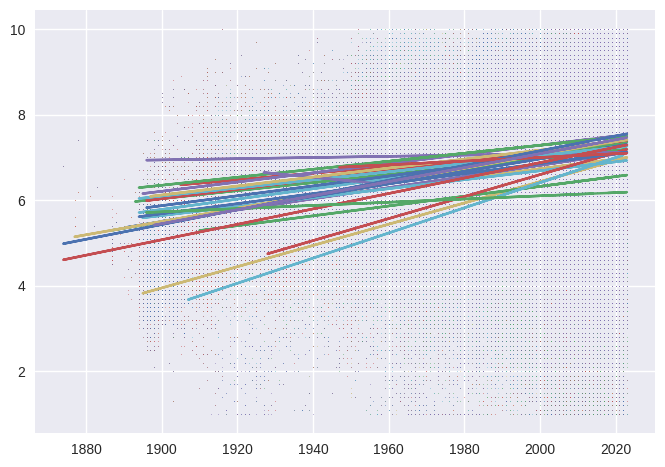

In [152]:
import matplotlib.pyplot as plt

for genre in genre_split:
  year = []
  rating = []
  
  for index, row in genre_split[genre].iterrows():
    if row['startYear'] != '\\N':
      
      year.append(int(row['startYear']))
      rating.append(float(row['averageRating']))
      if len(year) <= 10: 
        print(year, rating)
  
  plt.scatter(year, rating, s=.1, alpha=.75)

  a, b = best_fit(year, rating)

  yfit = [a + b * yeari for yeari in year]
  plt.plot(year, yfit)

best fit line:
y = -13.67 + 0.01x


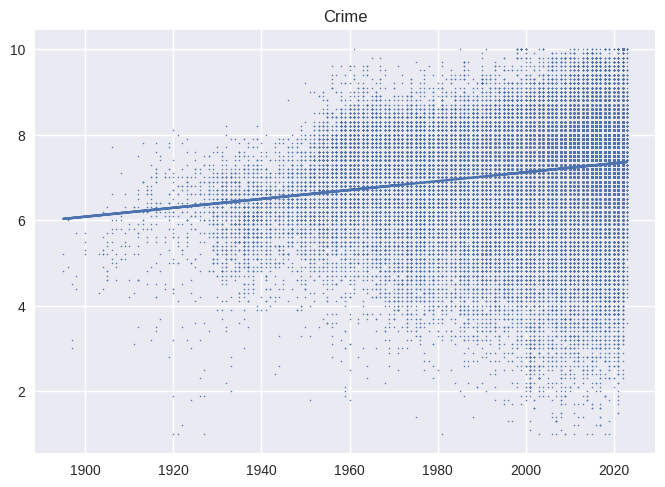

best fit line:
y = -11.80 + 0.01x


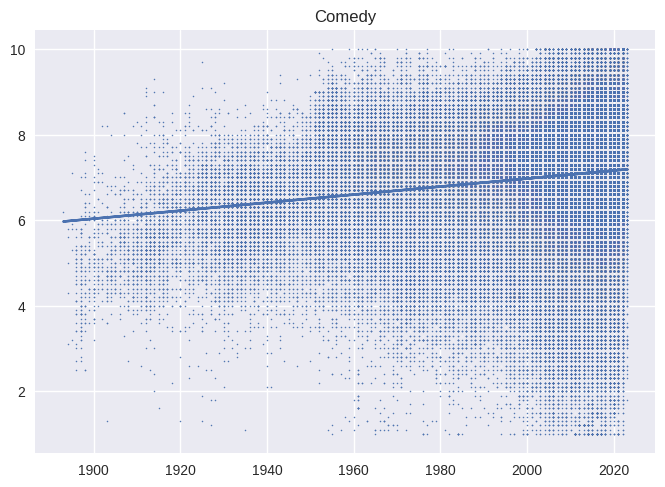

best fit line:
y = -8.47 + 0.01x


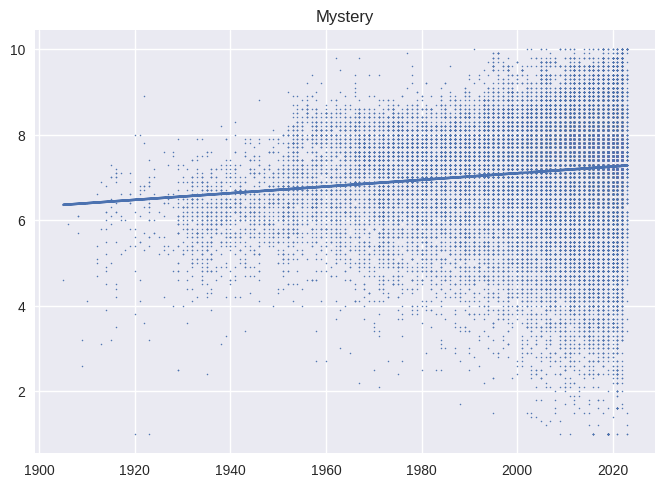

best fit line:
y = -14.26 + 0.01x


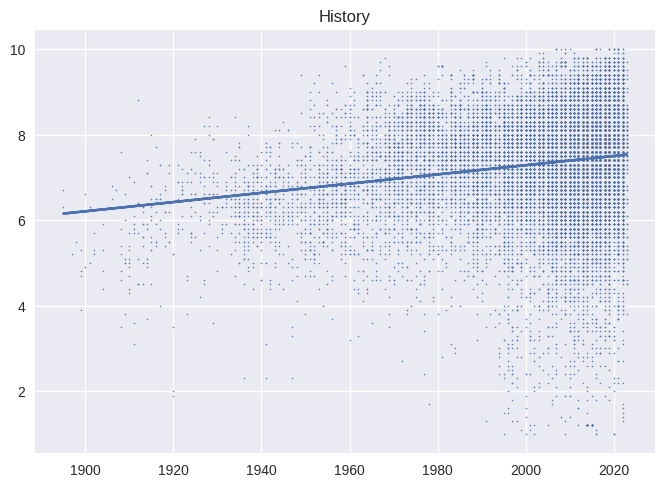

best fit line:
y = -15.88 + 0.01x


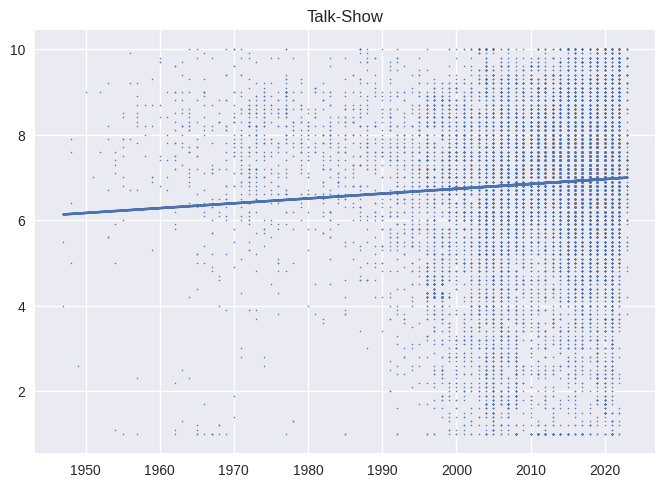

best fit line:
y = -17.17 + 0.01x


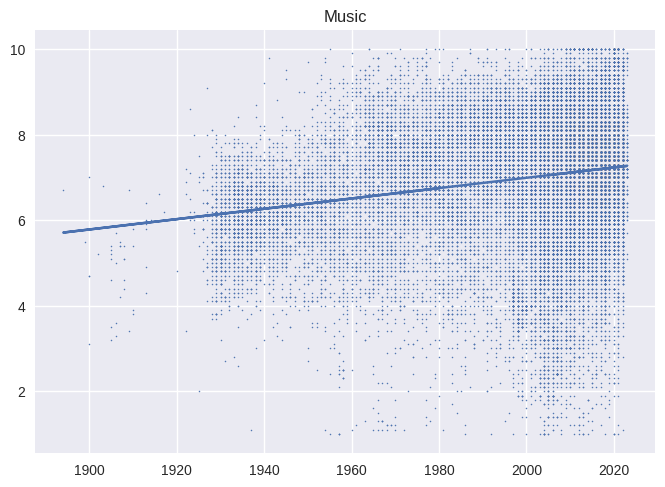

best fit line:
y = -16.04 + 0.01x


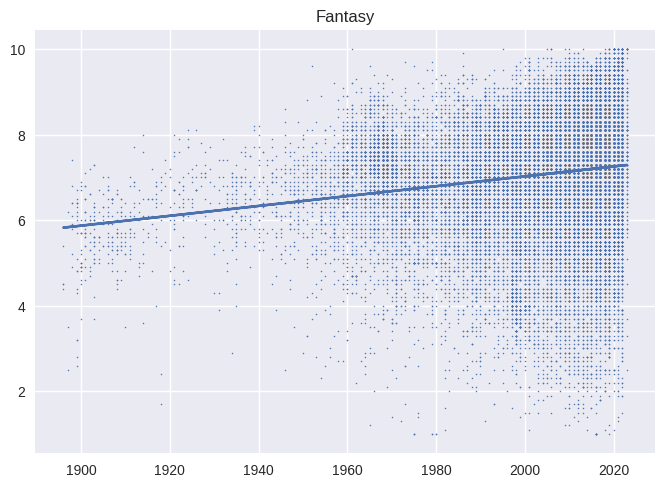

best fit line:
y = -23.33 + 0.02x


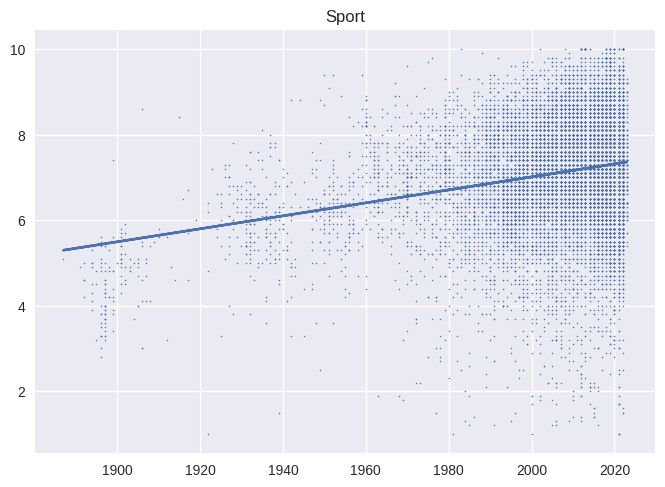

best fit line:
y = -15.07 + 0.01x


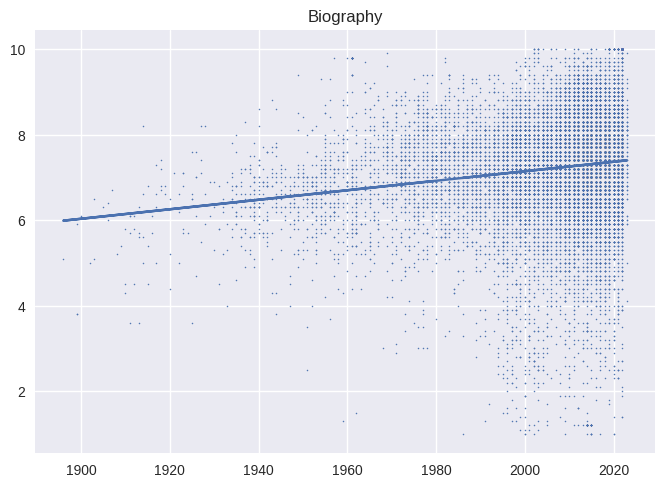

best fit line:
y = -19.32 + 0.01x


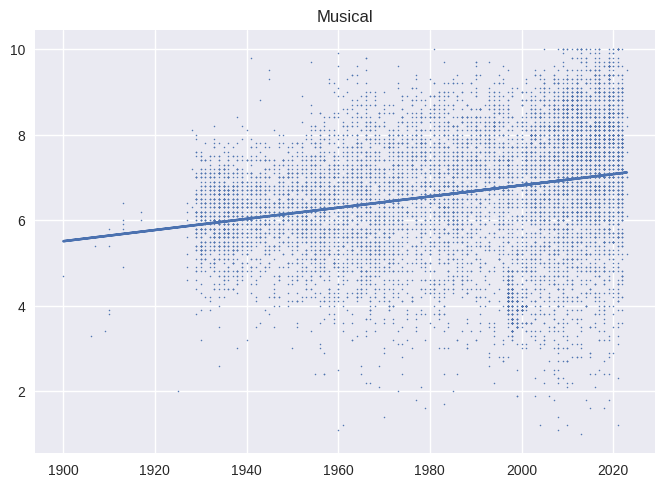

best fit line:
y = -43.24 + 0.02x


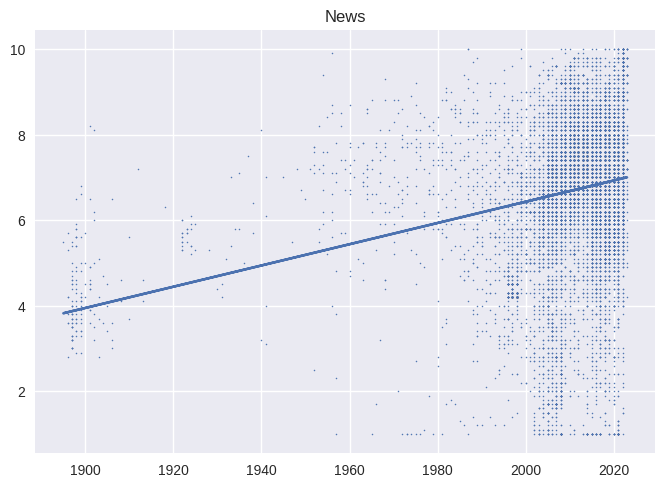

best fit line:
y = -14.25 + 0.01x


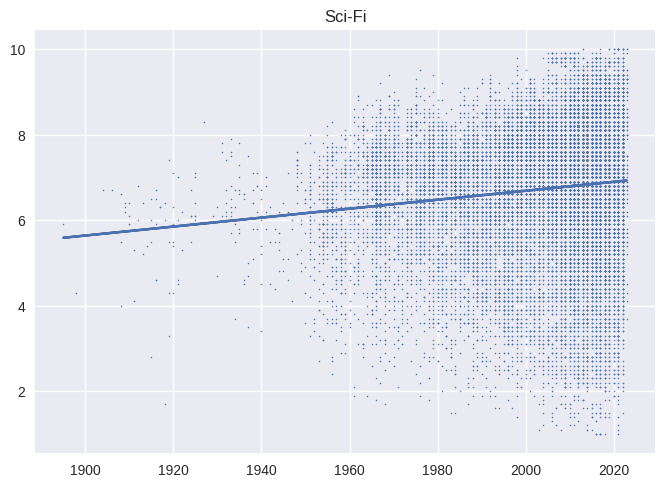

best fit line:
y = -22.31 + 0.01x


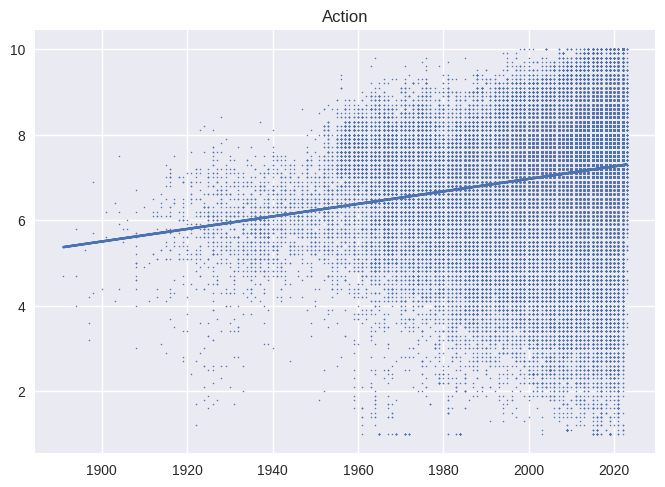

best fit line:
y = -16.63 + 0.01x


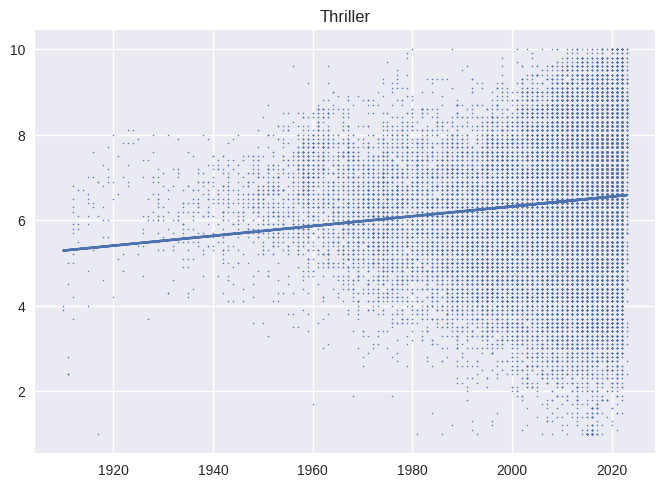

best fit line:
y = -44.80 + 0.03x


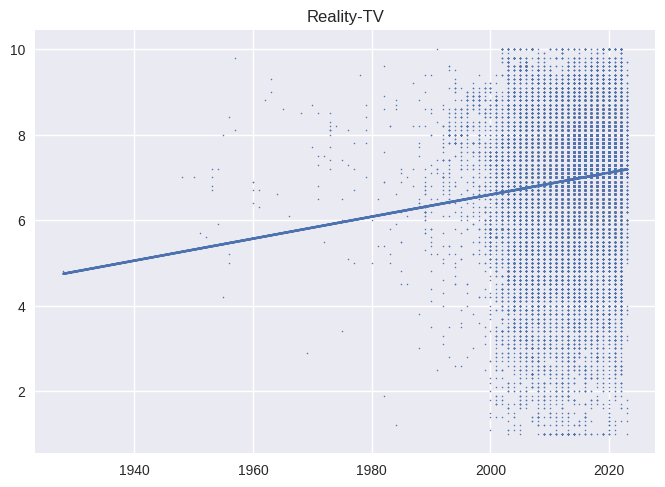

best fit line:
y = 4.28 + 0.00x


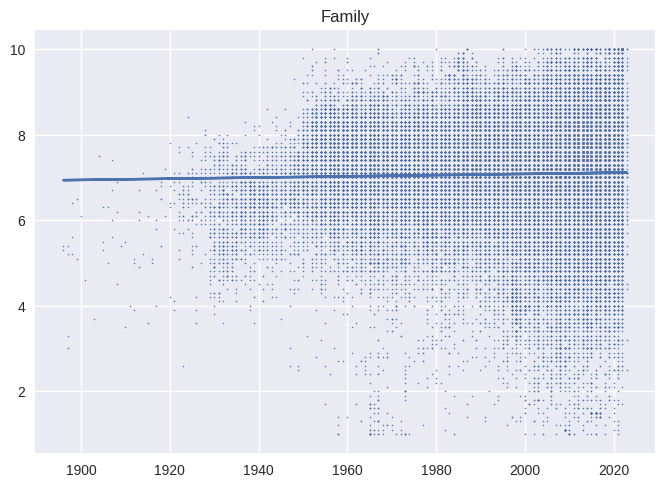

best fit line:
y = -24.08 + 0.02x


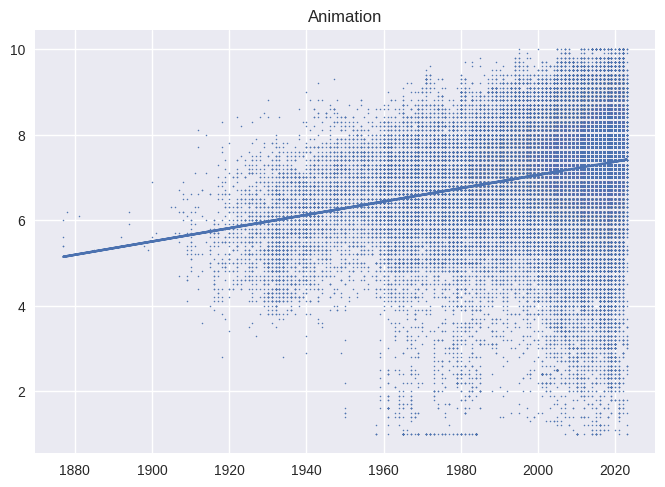

best fit line:
y = -11.87 + 0.01x


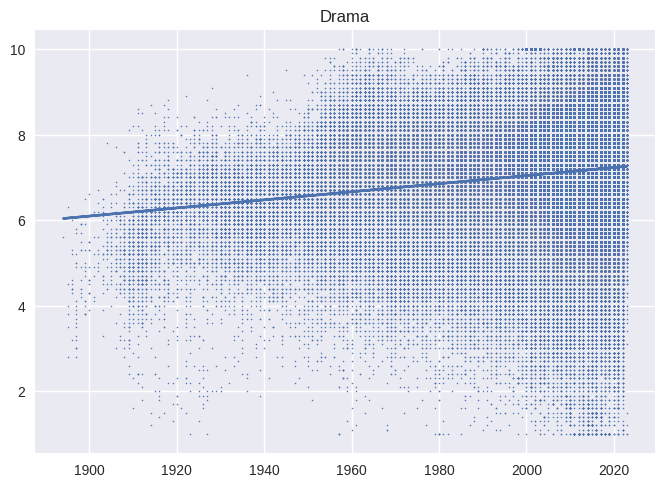

best fit line:
y = -16.56 + 0.01x


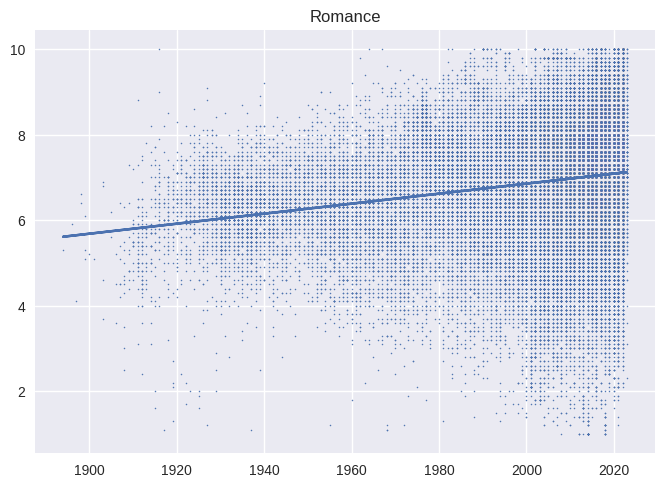

best fit line:
y = -11.40 + 0.01x


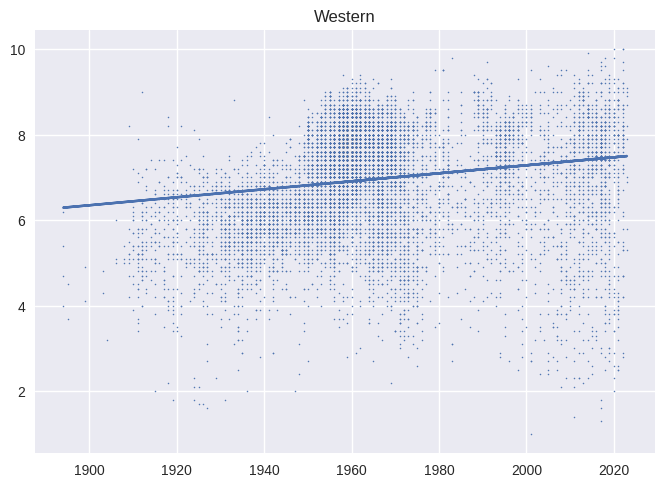

best fit line:
y = -29.18 + 0.02x


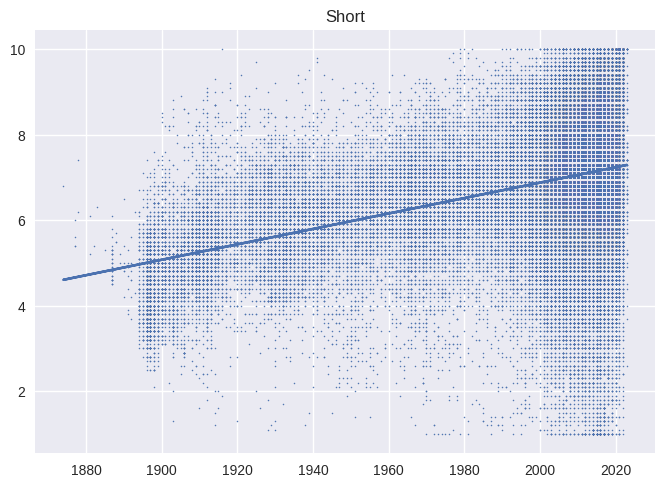

best fit line:
y = 23.14 + -0.01x


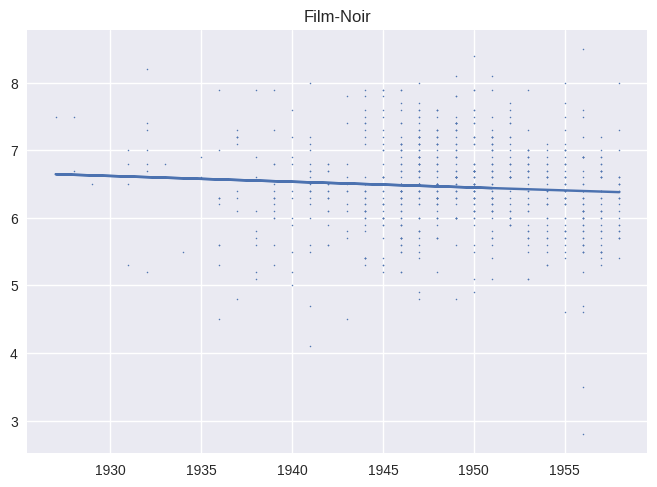

best fit line:
y = -13.80 + 0.01x


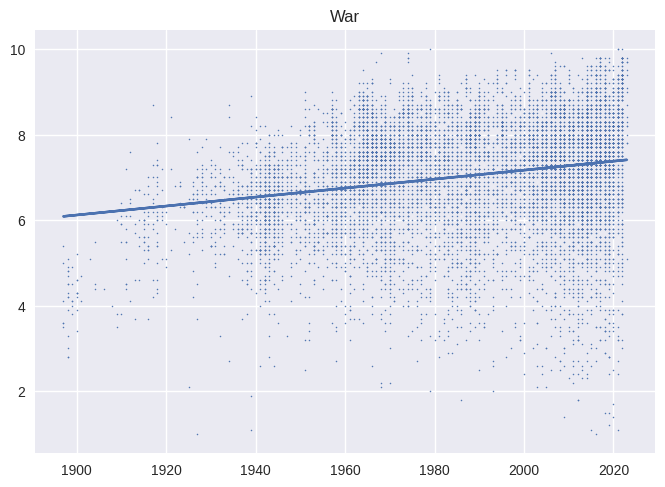

best fit line:
y = -52.38 + 0.03x


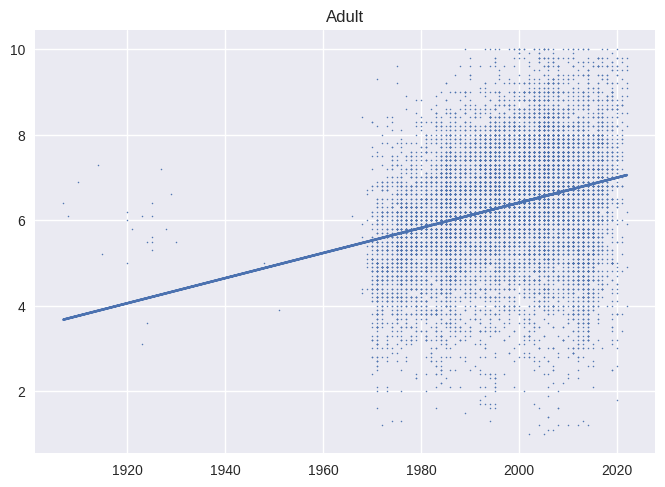

best fit line:
y = -27.32 + 0.02x


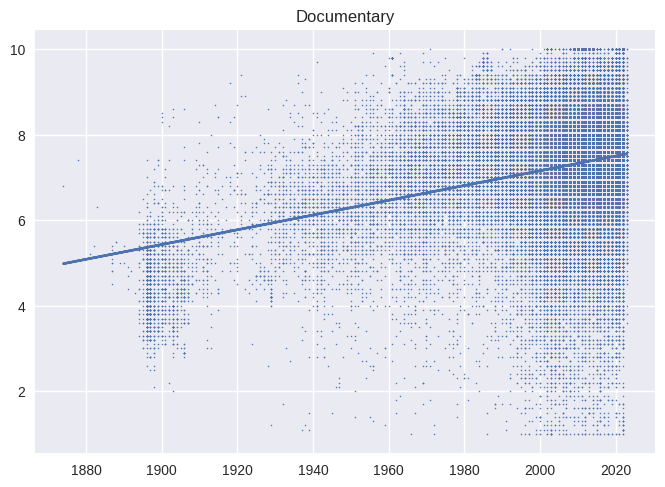

best fit line:
y = -1.38 + 0.00x


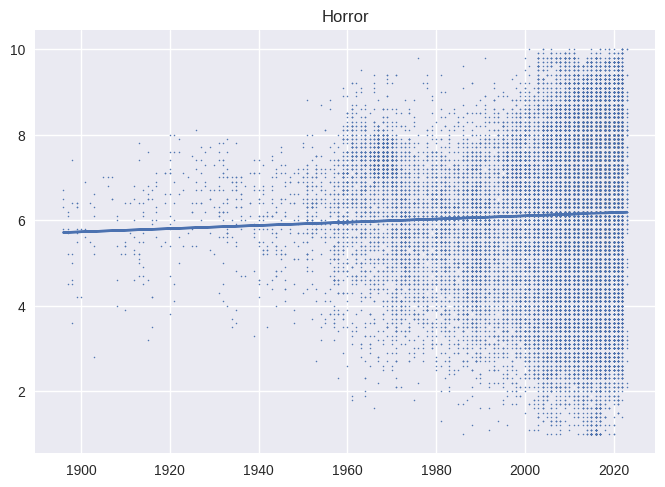

best fit line:
y = -1.64 + 0.00x


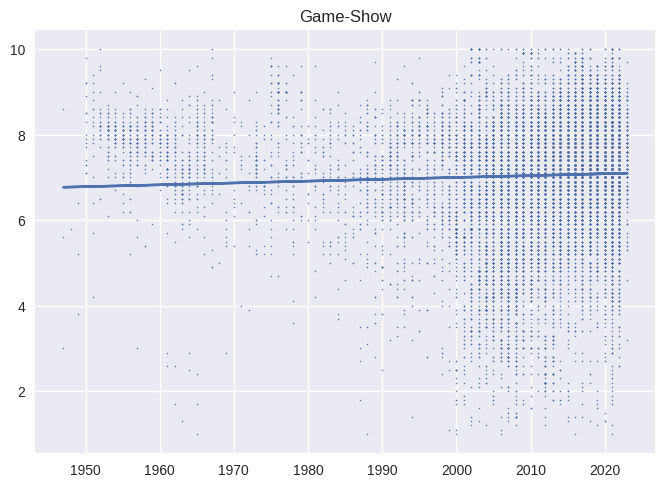

best fit line:
y = -25.62 + 0.02x


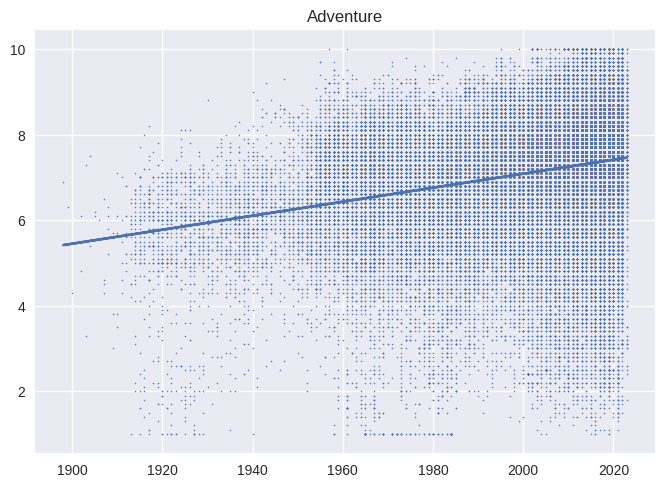

<Figure size 800x550 with 0 Axes>

In [153]:
import matplotlib.pyplot as plt
bestfits = {}
for genre in genre_split:
  year = []
  rating = []
  
  for index, row in genre_split[genre].iterrows():
    if row['startYear'] != '\\N':
      year.append(int(row['startYear']))
      rating.append(float(row['averageRating']))
  
  plt.title(genre)
  plt.scatter(year, rating, s=.6)

  a, b = best_fit(year, rating)
  bestfits[genre] = [a,b]
  yfit = [a + b * yeari for yeari in year]
  plt.plot(year, yfit)
  plt.show()
  plt.clf()

In [154]:
print(bestfits)
highestb = 0
highestbg = ""
highesta = 0
highestag = ""

lowestb = 0
lowestbg = ""
lowesta = 0
lowestag = ""

for genre in bestfits:
  if bestfits[genre][0] > highestb:
    highestb = bestfits[genre][0]
    highestbg = genre
  if bestfits[genre][1] > highesta:
    highesta = bestfits[genre][1]
    highestag = genre
  if bestfits[genre][0] < lowestb:
    lowestb = bestfits[genre][0]
    lowestbg = genre
  if bestfits[genre][1] < lowesta:
    lowesta = bestfits[genre][1]
    lowestag = genre

print(f"Highest starting value: {highestbg} with {highestb}\nMost improvement over the years: {highestag} with {highesta}")
print(f"Lowest starting value: {lowestbg} with {lowestb}\nMost degraded over the years: {lowestag} with {lowesta}")

{'Crime': [-13.671131278847193, 0.010395788689438055], 'Comedy': [-11.795263229268372, 0.009383896367721497], 'Mystery': [-8.466216847828097, 0.007781740083392541], 'History': [-14.26194920677155, 0.010773194898180736], 'Talk-Show': [-15.88283760667808, 0.011307874820479095], 'Music': [-17.1673809843522, 0.01207869555941277], 'Fantasy': [-16.04128647052476, 0.011532544104470056], 'Sport': [-23.33018962057568, 0.015170432738985837], 'Biography': [-15.070878855792985, 0.011106796646604895], 'Musical': [-19.32058360953547, 0.013067473863163316], 'News': [-43.23757993147416, 0.024833859310266243], 'Sci-Fi': [-14.246102994280857, 0.010466334309625723], 'Action': [-22.312620581447334, 0.014638582852197775], 'Thriller': [-16.62725084935351, 0.01147437696561087], 'Reality-TV': [-44.803702557104444, 0.025699811711743206], 'Family': [4.282853321573924, 0.0013987242237185034], 'Animation': [-24.080781062233218, 0.015569486341862723], 'Drama': [-11.871671560238065, 0.009456469018614395], 'Romance'

lets see how the numbers match up



In [156]:
difference = {}
for genre in bestfits:
  a = testbestfits[genre][0] - testbestfits[genre][0]
  b = testbestfits[genre][1] - testbestfits[genre][1]
  difference[genre] = [a,b]

for genre in difference:
  print(f"{genre}: {difference[genre][0]} {difference[genre][1]}")

Crime: 0.0 0.0
Comedy: 0.0 0.0
Mystery: 0.0 0.0
History: 0.0 0.0
Talk-Show: 0.0 0.0
Music: 0.0 0.0
Fantasy: 0.0 0.0
Sport: 0.0 0.0
Biography: 0.0 0.0
Musical: 0.0 0.0
News: 0.0 0.0
Sci-Fi: 0.0 0.0
Action: 0.0 0.0
Thriller: 0.0 0.0
Reality-TV: 0.0 0.0
Family: 0.0 0.0
Animation: 0.0 0.0
Drama: 0.0 0.0
Romance: 0.0 0.0
Western: 0.0 0.0
Short: 0.0 0.0
Film-Noir: 0.0 0.0
War: 0.0 0.0
Adult: 0.0 0.0
Documentary: 0.0 0.0
Horror: 0.0 0.0
Game-Show: 0.0 0.0
Adventure: 0.0 0.0


Our results seem to match up between testing and training data. This is most likely due to rounding and our large number of data points.